In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Connect Pandas to the database with this URL: 

In [3]:
cst_ab_pth = '/home/vanderscycle/Documents/Lighthouse-lab/Databases/w2-d2-db/imdb_pandas/cast.csv'
title_ab_pth = '/home/vanderscycle/Documents/Lighthouse-lab/Databases/w2-d2-db/imdb_pandas/titles.csv'


titles = pd.read_csv(title_ab_pth) # relative path use the forward slash
titles.head()
print(titles.columns)
cast = pd.read_csv(cst_ab_pth)
cast.head()

Index(['title', 'year'], dtype='object')


,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [4]:
titles[titles.title == 'Superman']

,title,year
16198,Superman,1987
101016,Superman,1997
107441,Superman,1948
127419,Superman,1973
154238,Superman,1978
183331,Superman,1980


In [6]:
s_titles = titles[titles['title'].str.contains('Superman')]

In [7]:
s_titles.head() 

,title,year
1737,Atom Man vs. Superman,1950
3177,"Zoom, Zoom, Superman!",1973
8329,Tesla the Superman,2009
13967,Little Superman,2014
16198,Superman,1987


In [61]:
#s_titles['year'].value_counts()

In [19]:
b_titles = titles[titles['title'].str.contains('Batman')]

In [20]:
#b_titles['year'].value_counts()

2016    6
2014    2
2017    2
1966    2
2010    2
1943    1
1973    1
1992    1
1967    1
1949    1
1965    1
1964    1
1995    1
1993    1
2005    1
1991    1
1989    1
2012    1
1997    1
Name: year, dtype: int64

In [33]:
#
delta_titles = (s_titles['year']-b_titles['year']).value_counts()#.dropna()
delta_titles

0.0    1
Name: year, dtype: int64

In [54]:
# gives NaN if there wasn't a batman or superman in the same year
delta_titles = (s_titles['year'].value_counts() - b_titles['year'].value_counts()).dropna()
delta_titles 

1967    0.0
1973    1.0
1997    0.0
2014   -1.0
2016   -5.0
2017   -1.0
Name: year, dtype: float64

In [56]:
for cursor in range(len(delta_titles)):
    print(delta_titles.iloc[cursor])

0.0
1.0
0.0
-1.0
-5.0
-1.0


In [60]:
for index,value in delta_titles.iteritems():
    if value == 0:
        print(f'year: {index} was neither a Batman nor Superman year as they produced the same amount of movies')
    elif value <=1:
        print(f'year: {index} was a Batman year as {abs(value)} movies were produced')
    else :
        print(f'year: {index} was a Superman year as {abs(value)} movies were produced')
    #print(index,value)

year: 1967 was neither a Batman nor Superman year as they produced the same amount of movies
year: 1973 was a Batman year as 1.0 movies were produced
year: 1997 was neither a Batman nor Superman year as they produced the same amount of movies
year: 2014 was a Batman year as 1.0 movies were produced
year: 2016 was a Batman year as 5.0 movies were produced
year: 2017 was a Batman year as 1.0 movies were produced


### How many years have been "Batman years", with more Batman characters than Superman characters?

In [83]:
#s_titles = titles[titles['title'].str.contains('Superman')]
s_cast = (cast[cast['title'].str.contains('Superman')]).groupby(['year']).count()
b_cast = (cast[cast['title'].str.contains('Batman')]).groupby(['year']).count()

In [87]:
#s_cast.head()

In [86]:
d_cast = (s_cast-b_cast).dropna()
d_cast

,title,name,type,character,n
year,,,,,
1967,0.0,0.0,0.0,0.0,0.0
1973,36.0,36.0,36.0,36.0,36.0
1997,-88.0,-88.0,-88.0,-88.0,-67.0
2016,-99.0,-99.0,-99.0,-99.0,-55.0
2017,-35.0,-35.0,-35.0,-35.0,0.0


In [90]:
for index,value in d_cast['character'].iteritems():
    if value == 0:
        print(f'year: {index} was neither a Batman nor Superman year as they produced the same amount of movies')
    elif value <=1:
        print(f'year: {index} was a Batman year as there was {abs(value)} more characters')
    else :
        print(f'year: {index} was a Superman year as there was {abs(value)} more characters')
    #print(index,value)

year: 1967 was neither a Batman nor Superman year as they produced the same amount of movies
year: 1973 was a Superman year as there was 36.0 more characters
year: 1997 was a Batman year as there was 88.0 more characters
year: 2016 was a Batman year as there was 99.0 more characters
year: 2017 was a Batman year as there was 35.0 more characters


### Count the number of actor roles each year and the number of actress roles each year over the history of film.

Made the question harder on myself. Next time jsut drop the last col. Talk to Eric about the powert of multi indexes

In [100]:
m_cast = cast[cast['type'].isin(['actor'])].groupby(['year'])#.value_counts()
m_cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
...,...,...,...,...,...,...
1707540,Inside Me,2023,Natalee Paul,actor,Lucy,NaN
1728670,Soldiers of the Cross,1900,Orrie Perry,actor,Lion,NaN
1728821,Soldiers of the Cross,1900,Reg Perry,actor,Lion,NaN
1813305,Inside Me,2023,Adrian (XI) Ramirez,actor,Luke Moldy,NaN


In [101]:
cast_multi_ind = cast.set_index(['year','type','n']).sort_index(level=[0,1,2])

In [109]:
male_cast_multi = cast_multi_ind.loc[(range(len(cast['year'])),'actor',range(len(cast['n'])))]

In [232]:
#should ahve been the answer
male_cast_multi_n_count = male_cast_multi.groupby(level=['year','type']).size()

In [172]:
#df.groupby(level=['A','B']).size()
male_cast_multi_n_count = male_cast_multi.groupby(level=['year','type','n']).size()
male_cast_multi_n_count.head()

year  type   n  
1906  actor  1.0    2
             2.0    2
1907  actor  1.0    1
             2.0    1
             3.0    1
dtype: int64

In [173]:
male_cast_multi_n_count.sum(level=0)

year
1906        4
1907        5
1908       25
1909        1
1910       19
        ...  
2016    41295
2017    11592
2018      357
2019       35
2020       25
Length: 115, dtype: int64

In [111]:
female_cast_multi = cast_multi_ind.loc[(range(len(cast['year'])),'actress',range(len(cast['n'])))]

In [145]:
female_cast_multi_n_count = female_cast_multi.groupby(level=['year','type','n']).size()
female_cast_multi_n_count.head()

year  type     n   
1906  actress  1.0     1
               2.0     1
               3.0     1
1908  actress  12.0    1
               20.0    1
                      ..
2020  actress  2.0     2
               3.0     2
               4.0     1
               6.0     2
               18.0    1
Length: 10576, dtype: int64

In [157]:
female_cast_multi_n_count.sum(level=0)

year
1906        3
1908       10
1910       12
1911       36
1912       59
        ...  
2016    24288
2017     7318
2018      249
2019       14
2020        8
Length: 113, dtype: int64

### Find the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

In [221]:
#having issues with multi index subs when values are missing e.g.nil female actress in 1907/1909
delta_cast_mindex_ncount = male_cast_multi_n_count.sum(level=0) - female_cast_multi_n_count.sum(level=0)
delta_cast_mindex_ncount[2016]

17007.0

### What is the fraction of roles that have been 'actor' roles each year in the history of film.

In [218]:
male_cast_multi_n_count.sum(level=0)[2020]

25

In [219]:
date_r = range(len(male_cast_multi_n_count.sum(level=0)))
date_r

range(0, 115)

In [278]:
delta_sum_mindex_ncount = male_cast_multi_n_count.sum(level=0) + female_cast_multi_n_count.sum(level=0)
year = 1906
fraction_dict = dict()
for time in date_r:
    year += 1
    if year >2020:
        break
    #m_year = (male_cast_multi_n_count.sum(level=0)[year])
    frac = (male_cast_multi_n_count.sum(level=0)[year])/(delta_sum_mindex_ncount[year])

    fraction_dict[year] = round(frac,2)

    #print(f'{year},{round(frac,2)}')

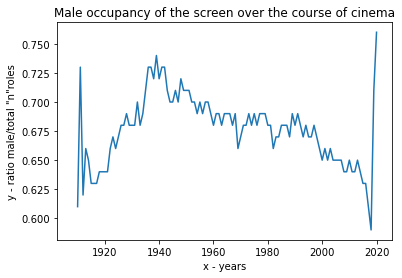

In [279]:
#plot
lists = sorted(fraction_dict.items())
x, y = zip(*lists)
plt.plot(x, y)
plt.xlabel('x - years')
plt.ylabel('y - ratio male/total "n"roles')
plt.title('Male occupancy of the screen over the course of cinema')
plt.show()

2.38

### What is the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

In [231]:
male_cast_multi_n_count = male_cast_multi.groupby(level=['year','type']).size()
male_cast_multi_n_count.head()

year  type 
1906  actor     4
1907  actor     5
1908  actor    25
1909  actor     1
1910  actor    19
dtype: int64

In [245]:
male_n2_cast_multi = cast_multi_ind.loc[(range(len(cast['year'])),'actor',2)].groupby(level=['year','type']).size()

In [246]:
male_n2_cast_multi

year  type 
1906  actor       2
1907  actor       1
1908  actor       2
1910  actor       2
1911  actor      14
               ... 
2016  actor    2337
2017  actor     883
2018  actor      41
2019  actor       7
2020  actor       1
Length: 114, dtype: int64

In [273]:
# same as the dict .get() method for possible missing keys
if pd.isnull(male_n2_cast_multi.get(1919)):
    print(1)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [280]:
year = 1906
fraction_m2_dict = dict()
for time in date_r:
    year += 1
    if year >2020:
        break
    try:
        frac = (male_n2_cast_multi[year])/(delta_sum_mindex_ncount[year])
        fraction_m2_dict[year] = round(frac,2)
    except:
        fraction_m2_dict[year] = 0


        

    #print(f'{year},{round(frac,2)}')

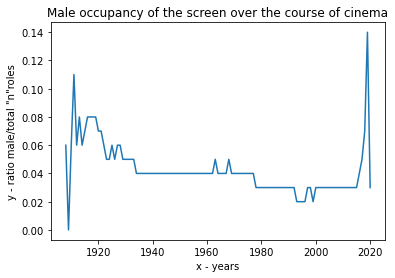

In [281]:
#plot
lists = sorted(fraction_m2_dict.items())
x, y = zip(*lists)
plt.plot(x, y)
plt.xlabel('x - years')
plt.ylabel('y - ratio male/total "n"roles')
plt.title('Male occupancy of the screen over the course of cinema')
plt.show()